In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:
INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/af_depth/"
DONOR = 0



In [3]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

fig_utils from mplh
here
0.5.6


In [4]:
out_f = join(OUTDIR, f"donor{DONOR}")


## Load cluster results and plot dendrograms

In [5]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


In [6]:
print(AF_df.shape)
AF_df.head()

(68, 9023)


,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
Variant,,,,,,,,,,,,,,,,,,,,,
10397G,1.000000,1.0,0.0,0.8,1.0,1.0,1.0,1.0,1.000000,1.0,...,0.979798,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.978495,1.0,1.000000
10463C,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10559G,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10589A,0.882353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.000000,0.984848,1.0,0.970588,0.736842,0.966102,1.0,1.000000,1.0,1.000000
11251G,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.000000,0.036145,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.023256


In [7]:
print(DP_df.shape)
DP_df.head()

(68, 9023)


,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
Variant,,,,,,,,,,,,,,,,,,,,,
10397G,2.0,16.0,1.0,5.0,14.0,58.0,39.0,12.0,15.0,59.0,...,99.0,92.0,116.0,39.0,38.0,69.0,72.0,93.0,71.0,67.0
10463C,11.0,16.0,3.0,9.0,6.0,48.0,30.0,3.0,8.0,39.0,...,78.0,99.0,156.0,22.0,14.0,77.0,58.0,89.0,49.0,91.0
10559G,15.0,26.0,5.0,5.0,10.0,66.0,16.0,5.0,21.0,59.0,...,86.0,80.0,138.0,32.0,13.0,60.0,48.0,77.0,64.0,87.0
10589A,17.0,21.0,6.0,7.0,9.0,67.0,24.0,12.0,18.0,48.0,...,88.0,66.0,135.0,34.0,19.0,59.0,55.0,99.0,71.0,80.0
11251G,13.0,25.0,5.0,7.0,12.0,91.0,37.0,16.0,26.0,75.0,...,78.0,83.0,133.0,45.0,30.0,81.0,90.0,139.0,80.0,86.0


## Scatter

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


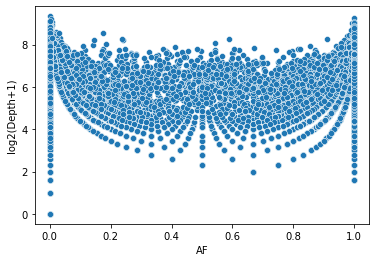

In [8]:
sns.scatterplot(AF_df.values.flatten(), np.log2(DP_df.values.flatten()+1))
plt.xlabel("AF")
plt.ylabel("log2(Depth+1)")
plt.savefig(f"{out_f}.all_variants.png")

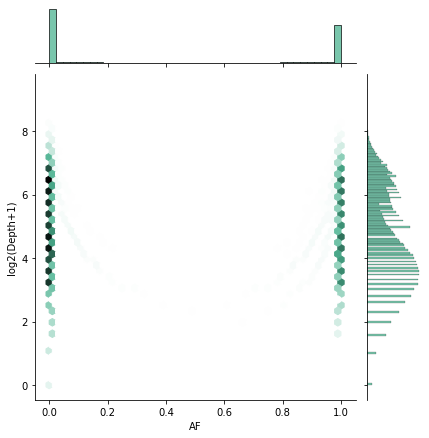

In [9]:
sns.jointplot(x=AF_df.values.flatten(), y=np.log2(DP_df.values.flatten()+1), 
              kind="hex", color="#4CB391")
plt.xlabel("AF")
plt.ylabel("log2(Depth+1)")
plt.savefig(f"{out_f}.all_variants_hex.png")

In [10]:
def rm_high(df, thresh, pct_thresh):
    return df.loc[~(((df>thresh).sum(axis=1)>pct_thresh*df.shape[0]))]

def rm_low(df, thresh, pct_thresh):
    return df.loc[~((df<thresh).sum(axis=1)>(pct_thresh*df.shape[1]))]

donor_inds = AF_df.index[((AF_df>0.8).sum(axis=1)>(0.8*AF_df.shape[1]))]
donor_inds
AF_df_noDon = rm_high(AF_df, 0.8,0.8)
DP_df_noDon = DP_df.loc[AF_df_noDon.index, AF_df_noDon.columns]

## Variant-specific

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


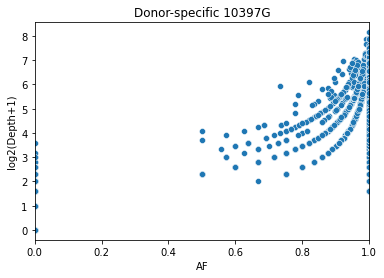

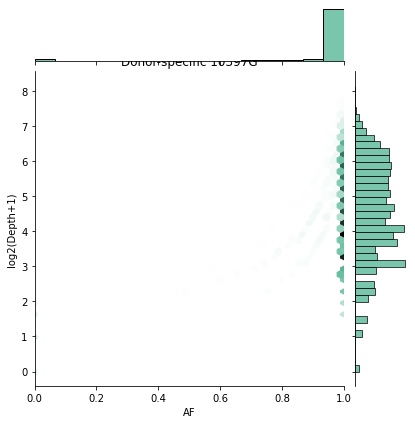

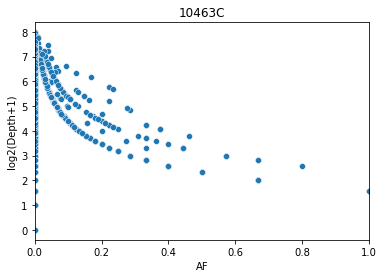

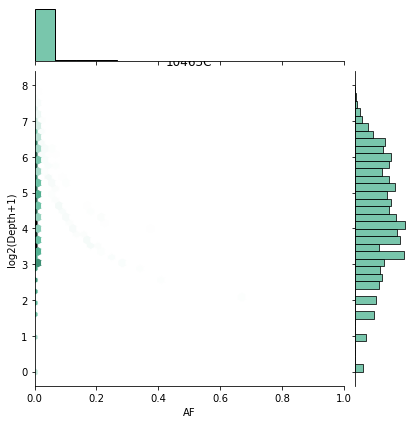

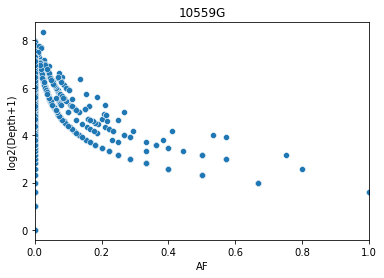

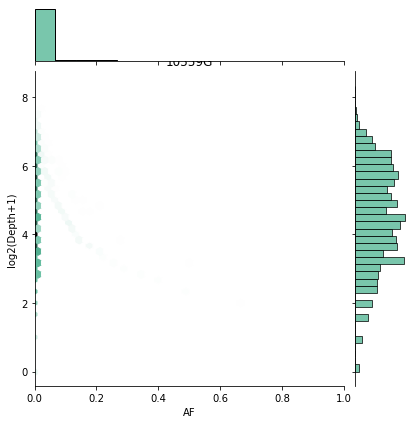

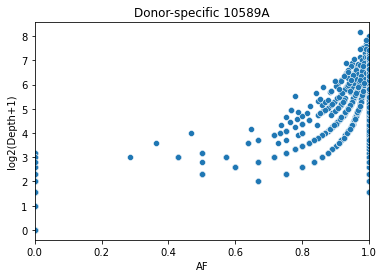

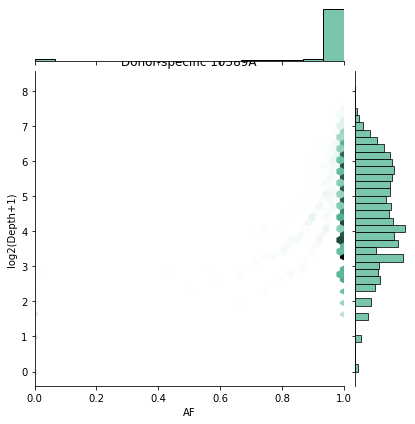

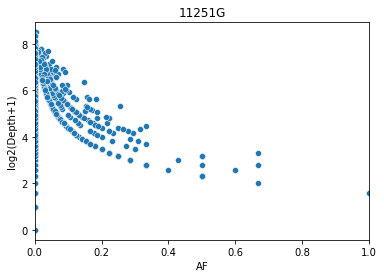

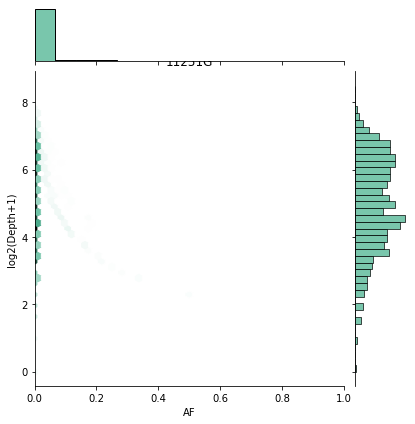

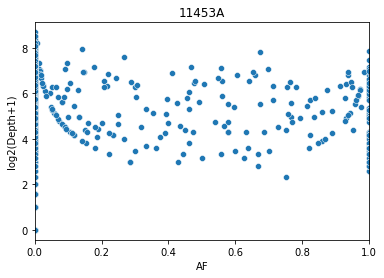

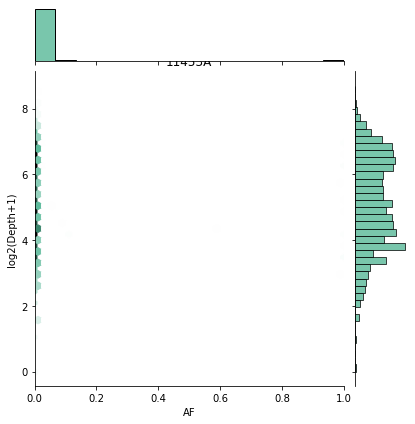

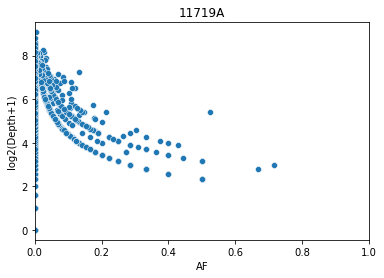

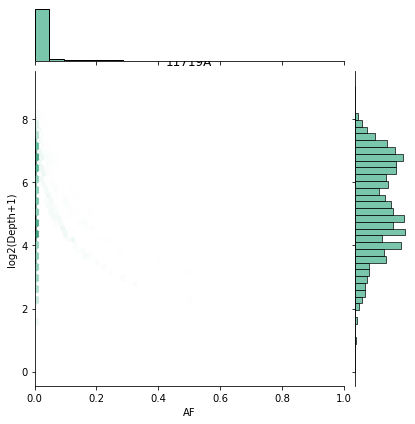

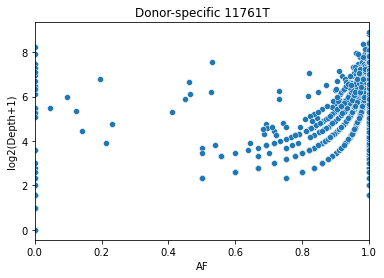

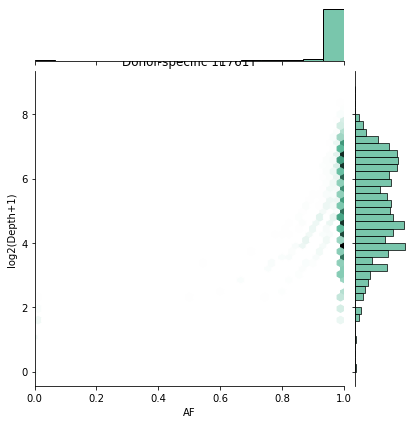

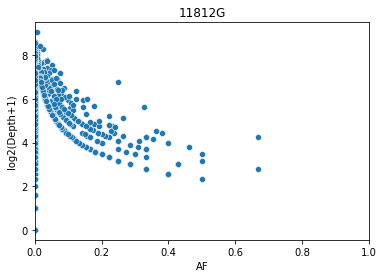

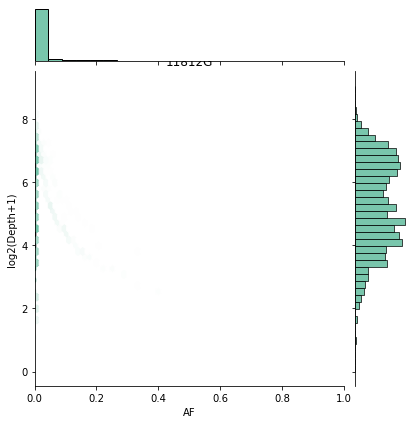

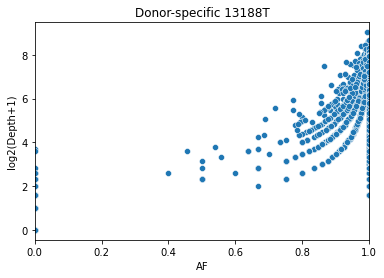

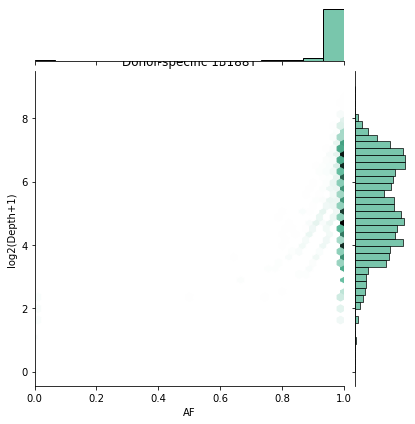

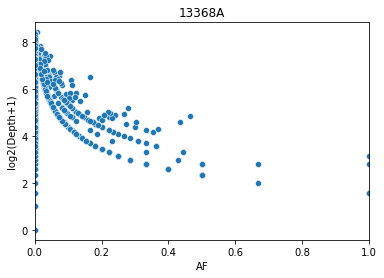

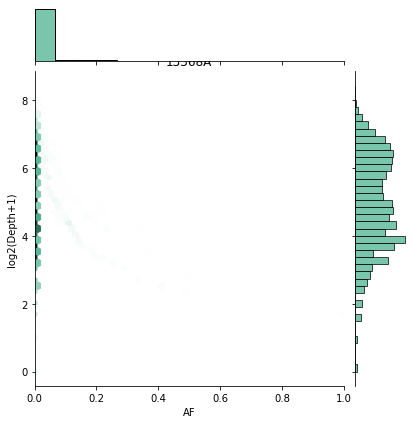

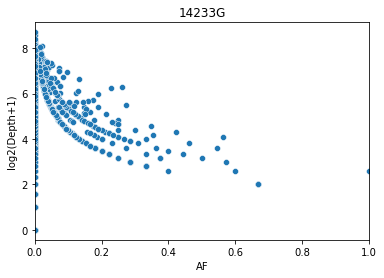

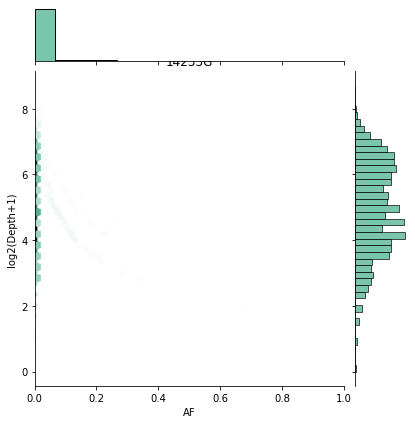

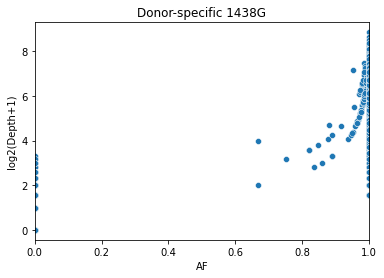

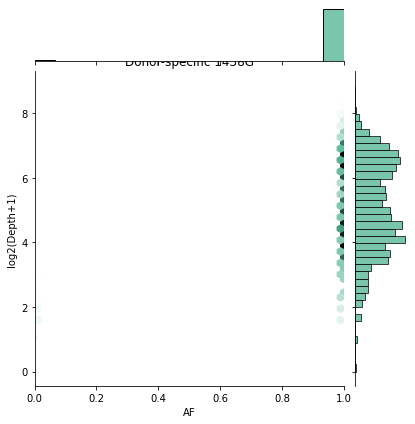

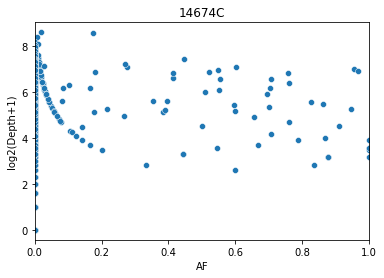

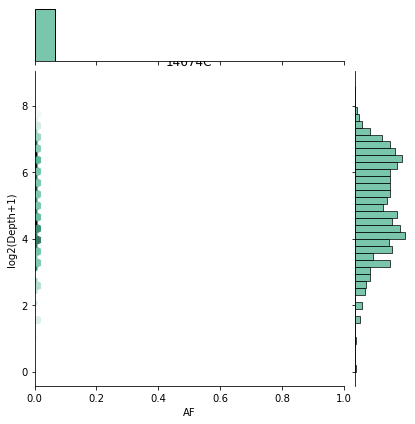

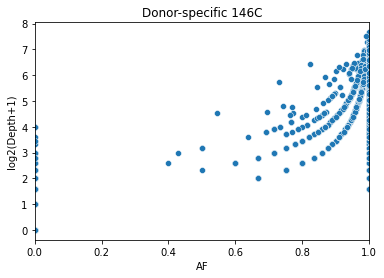

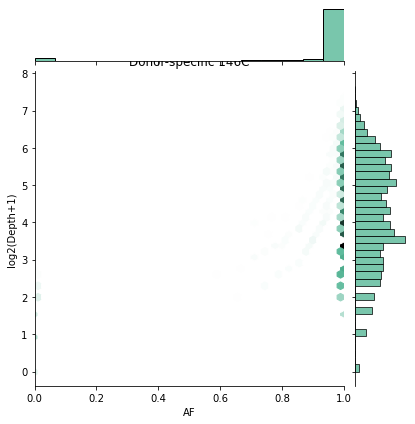

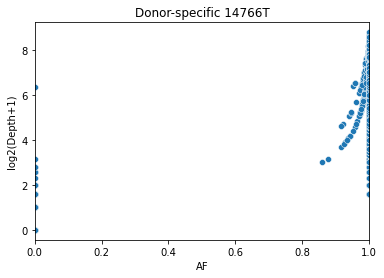

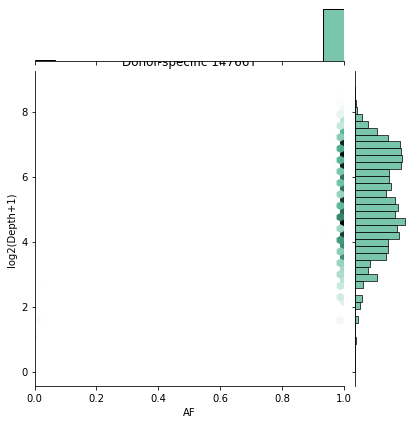

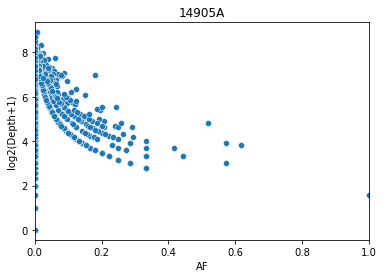

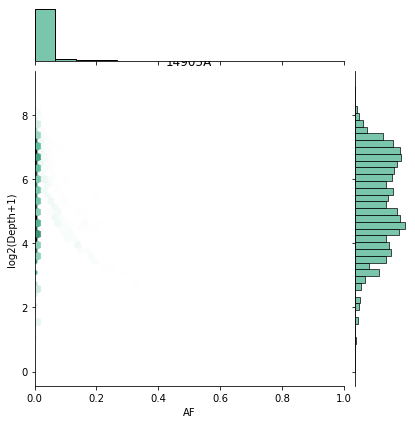

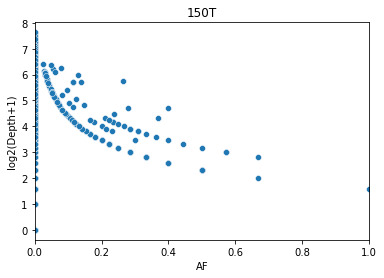

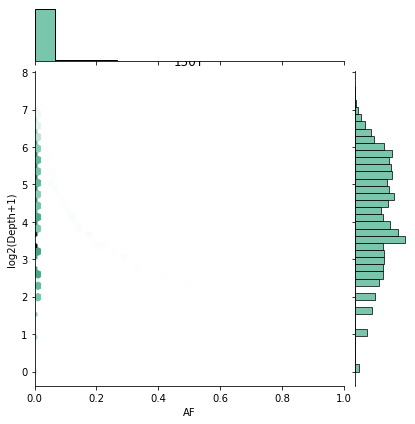

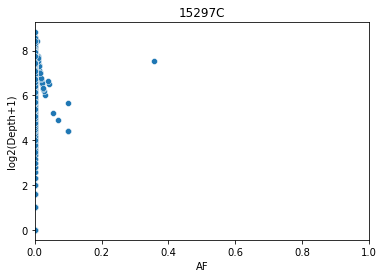

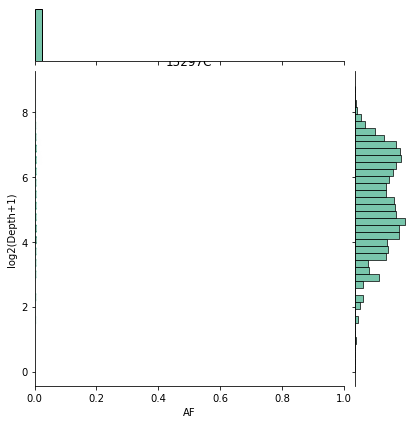

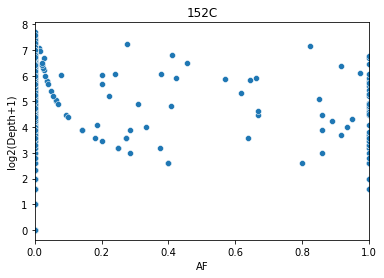

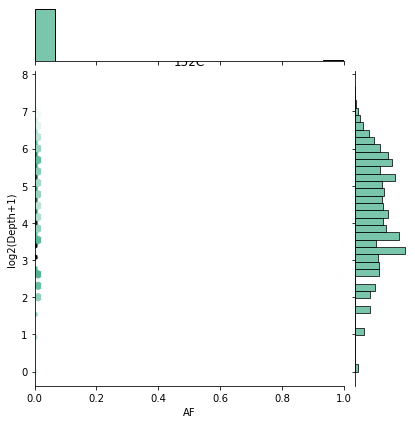

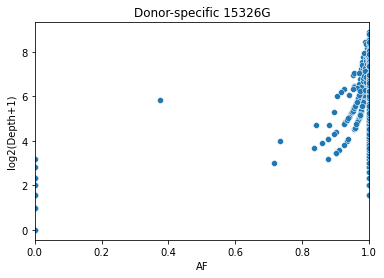

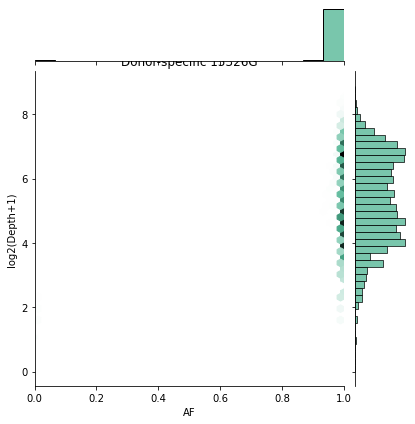

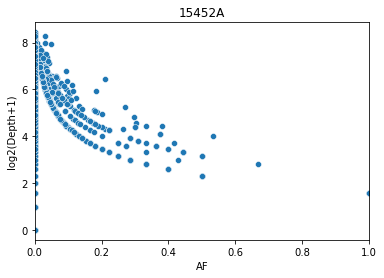

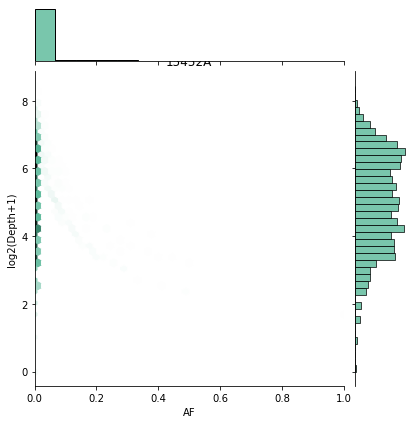

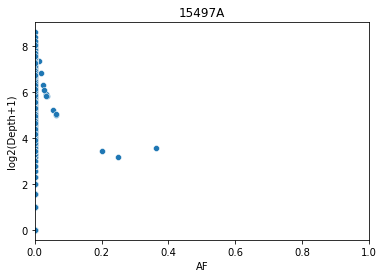

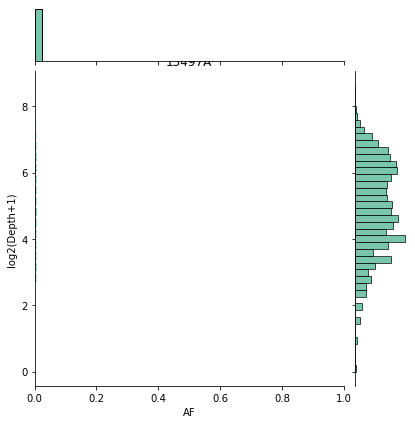

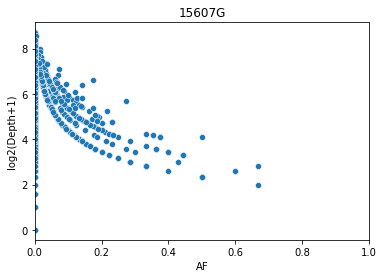

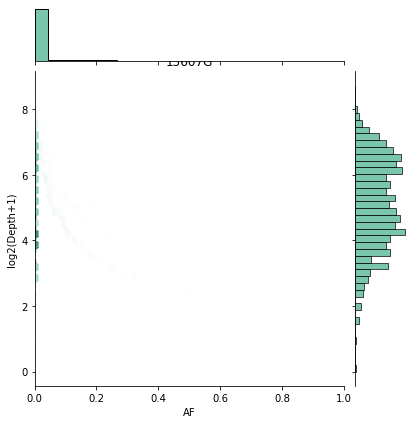

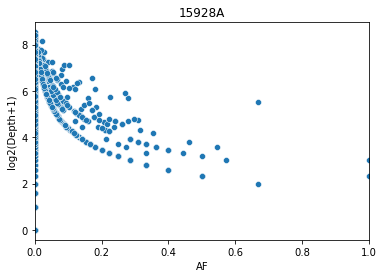

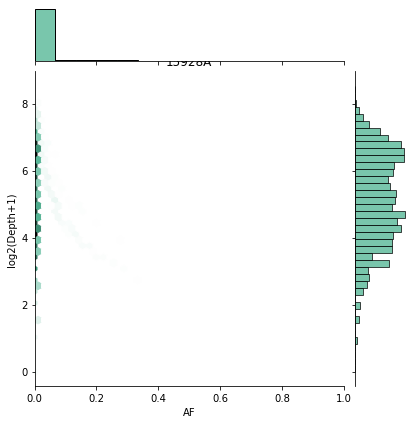

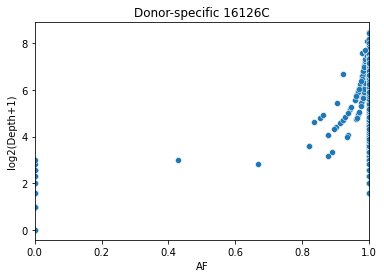

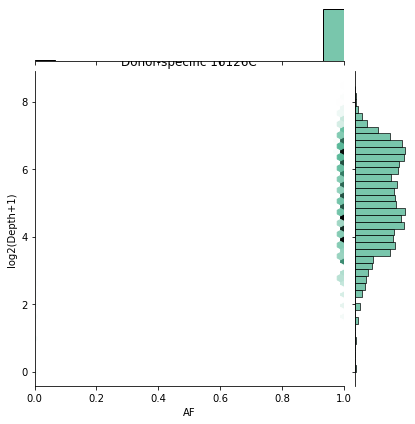

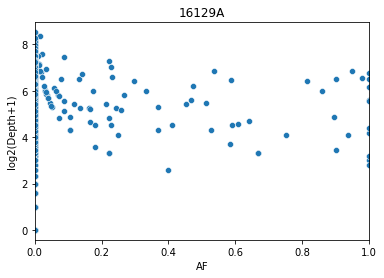

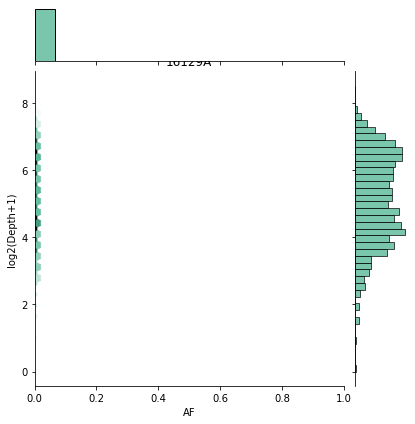

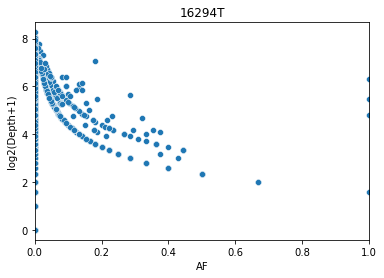

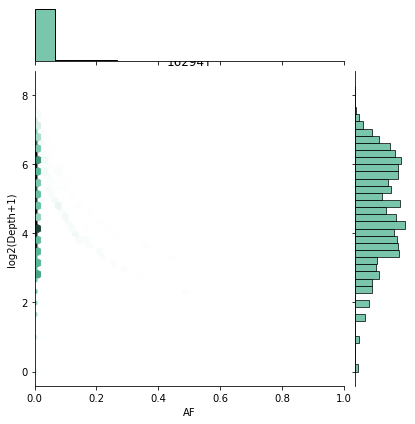

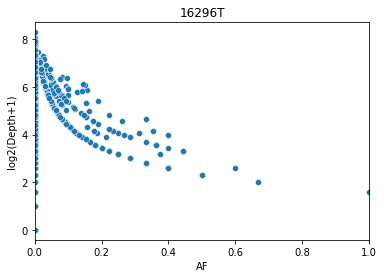

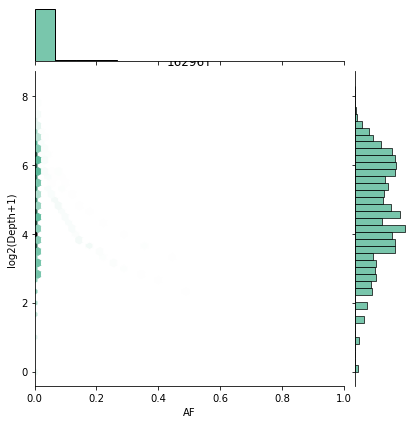

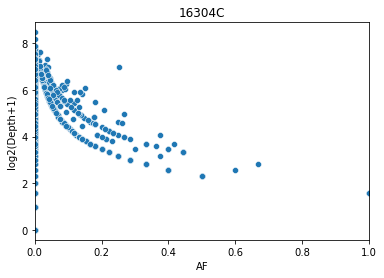

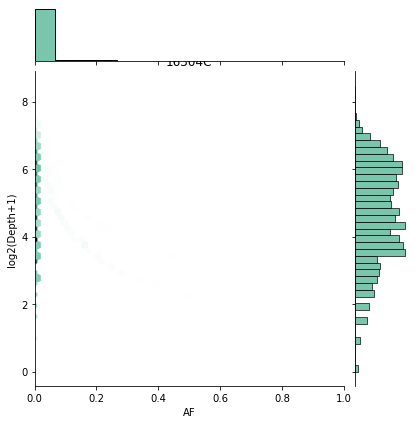

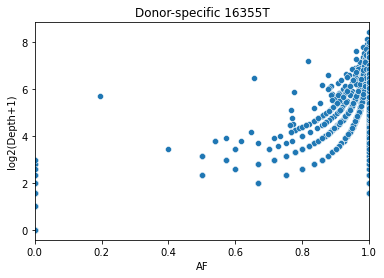

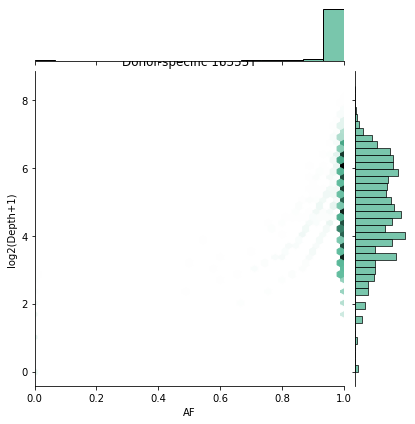

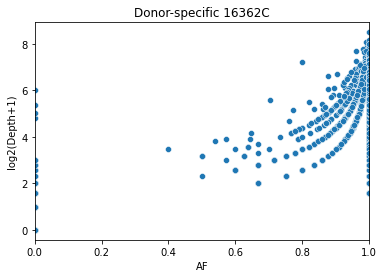

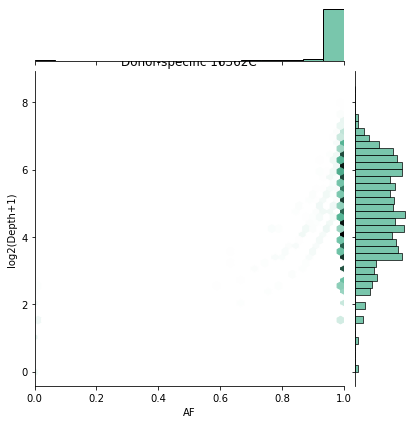

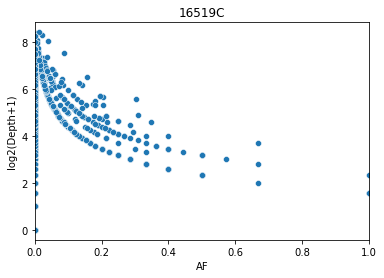

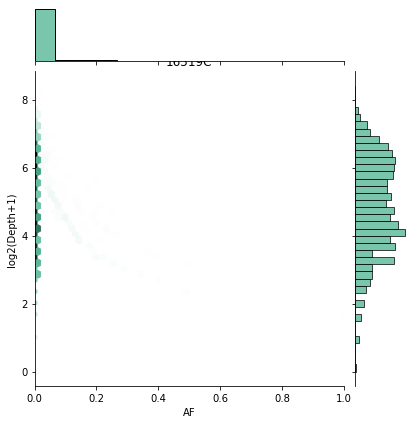

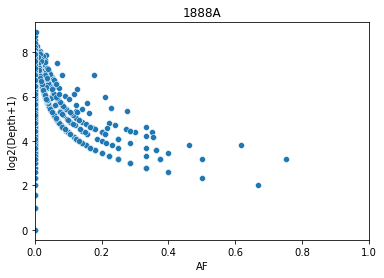

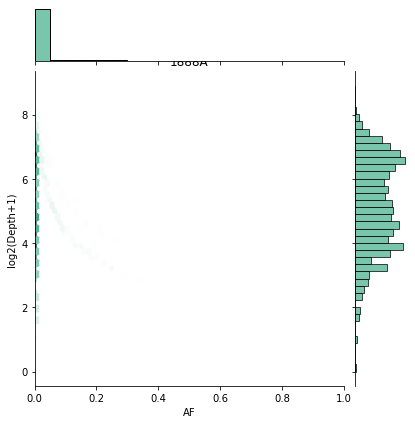

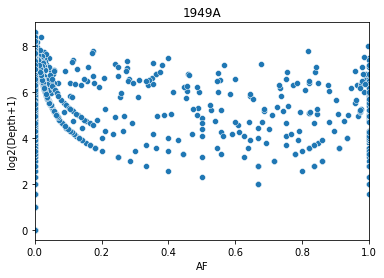

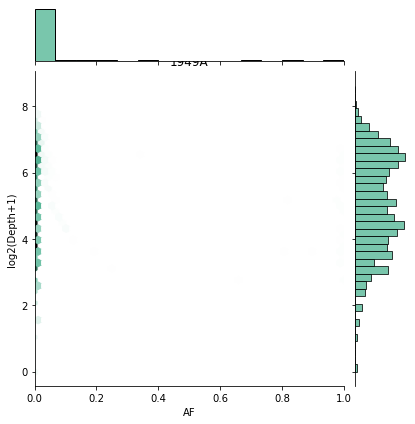

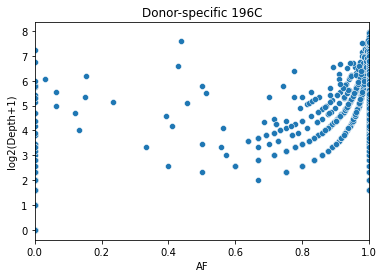

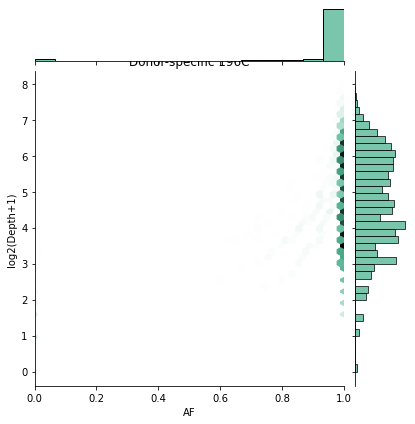

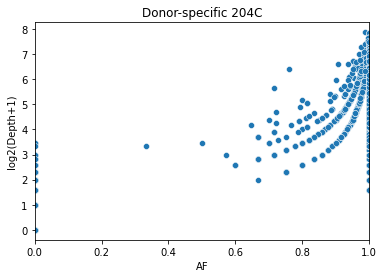

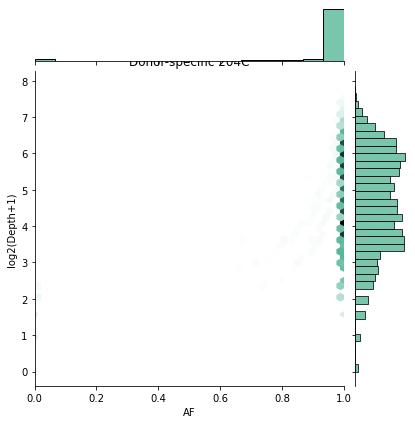

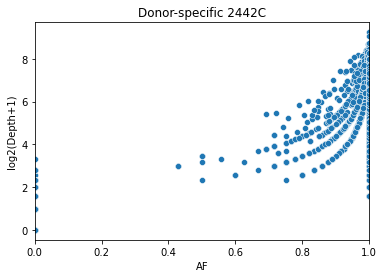

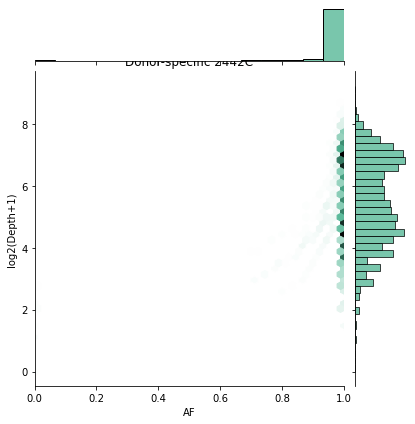

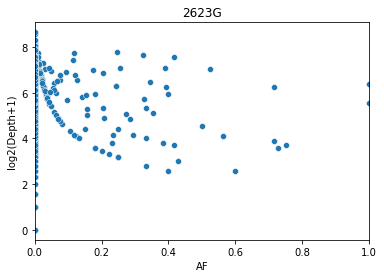

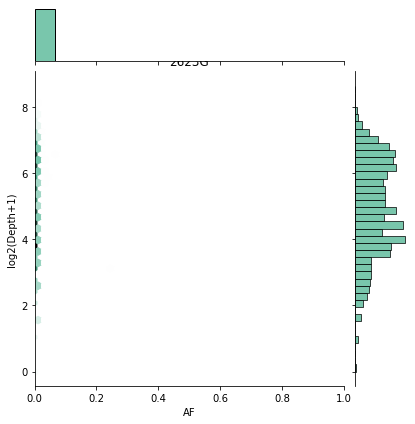

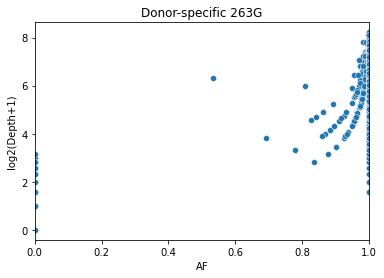

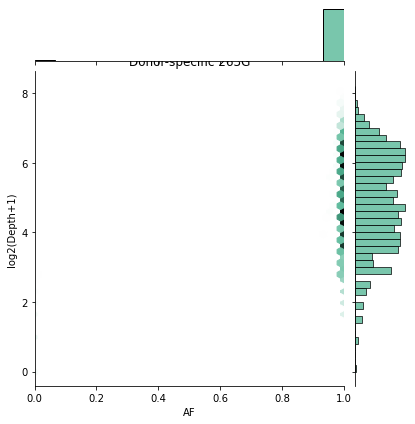

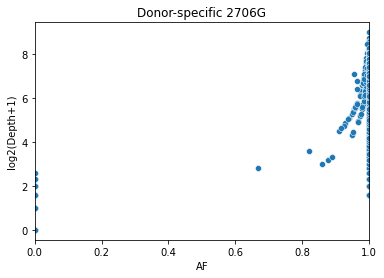

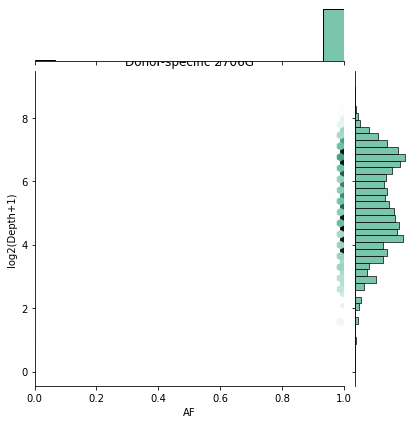

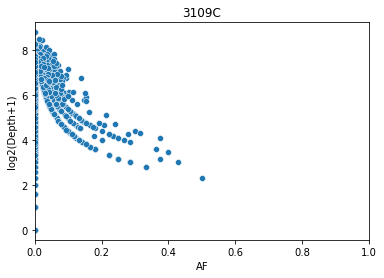

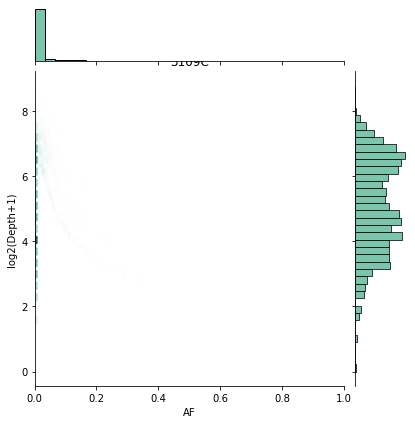

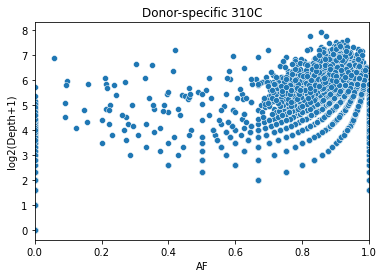

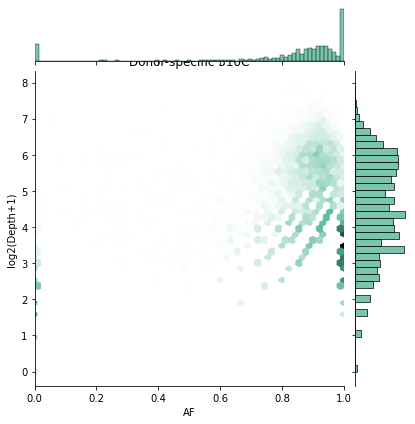

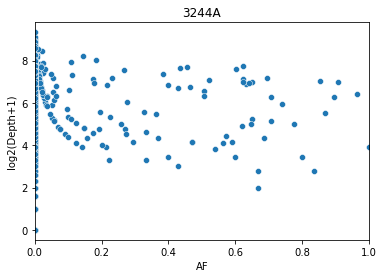

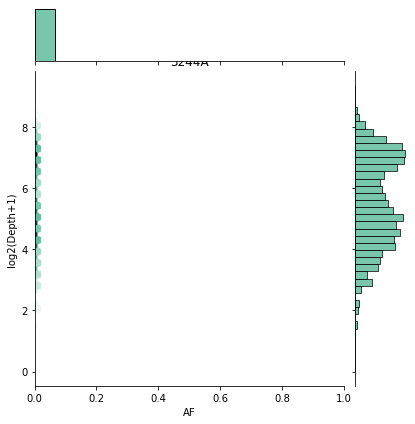

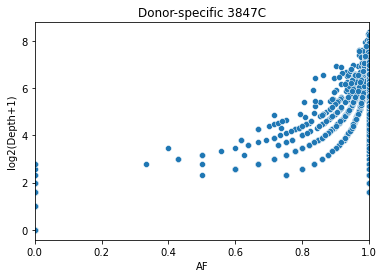

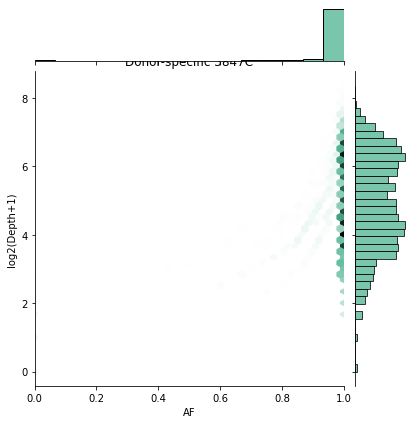

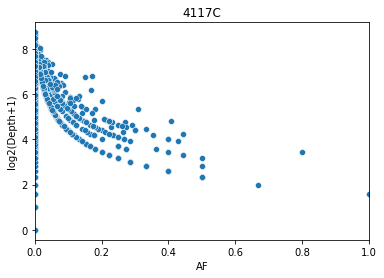

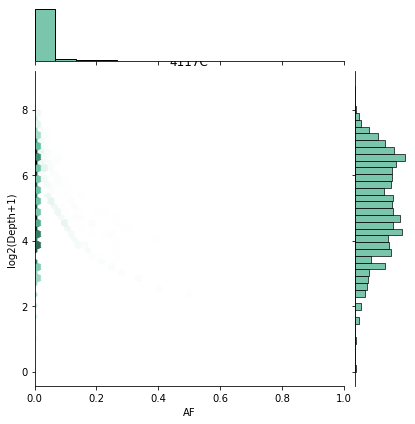

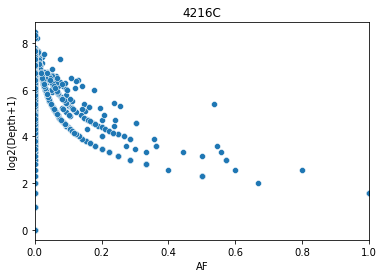

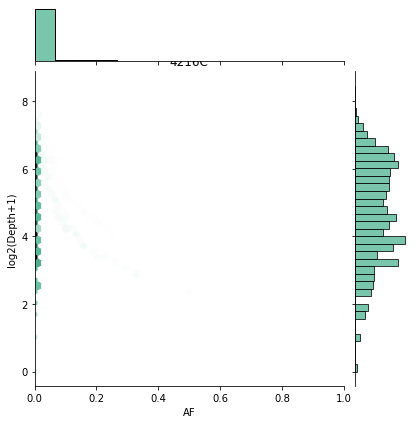

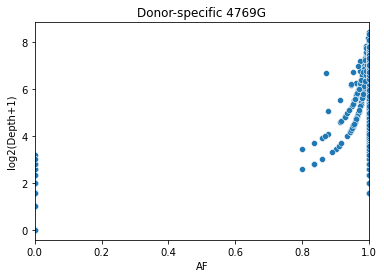

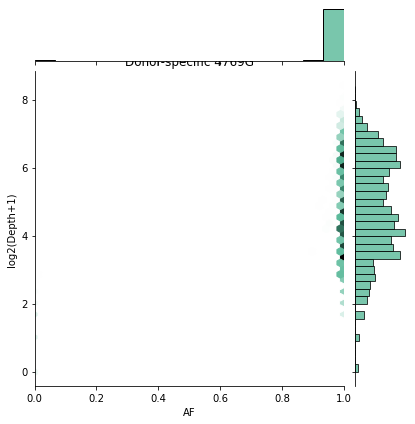

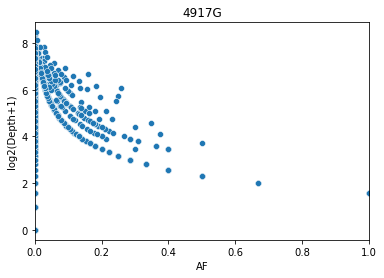

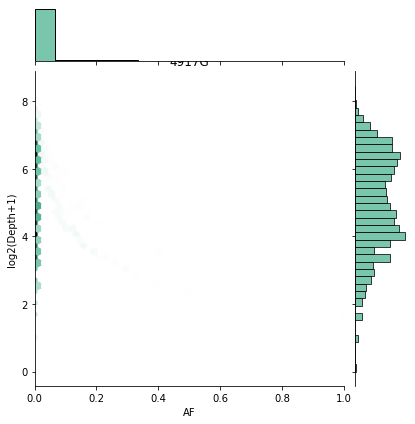

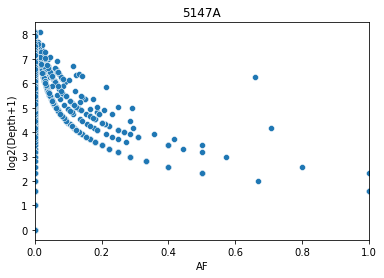

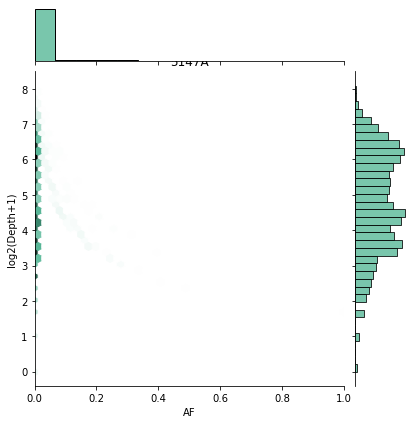

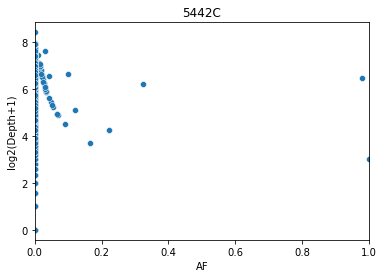

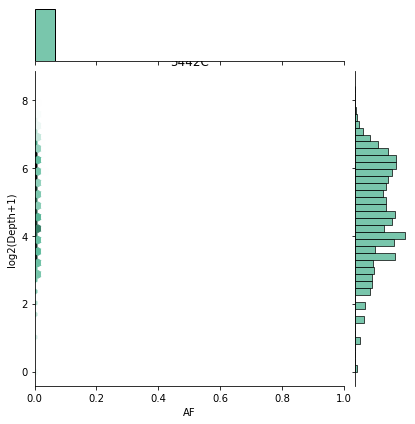

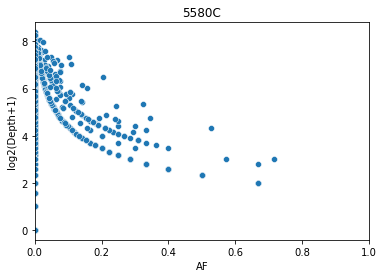

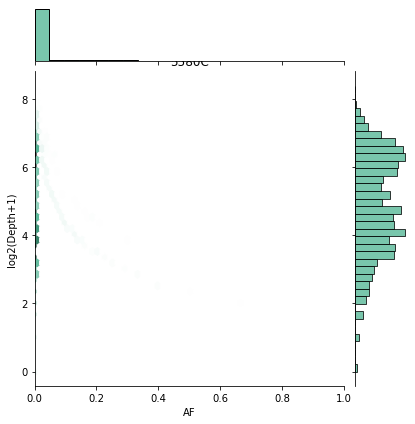

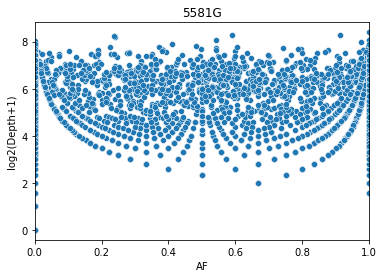

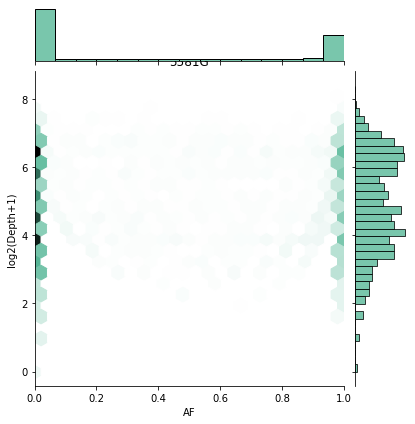

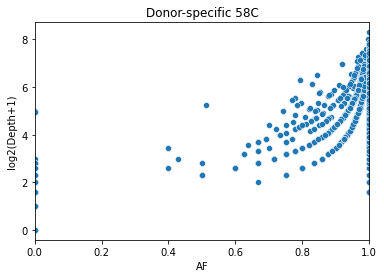

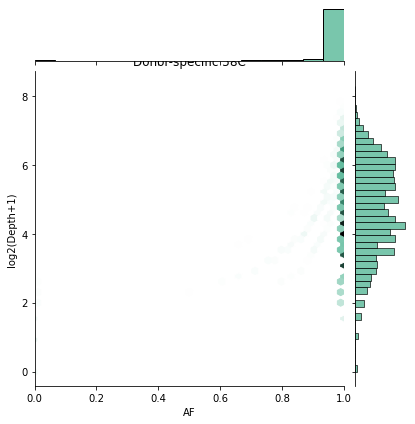

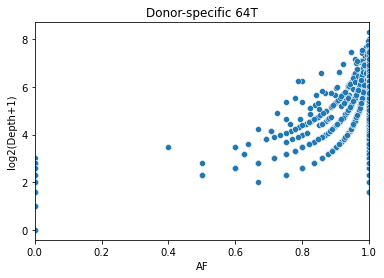

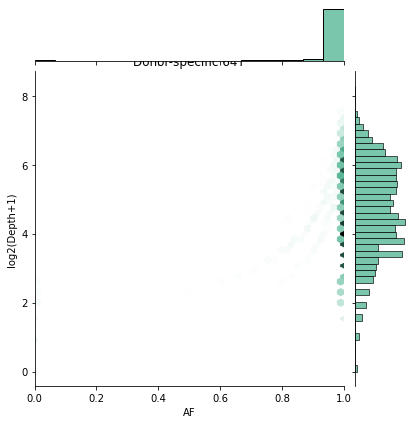

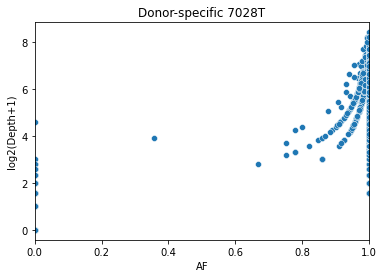

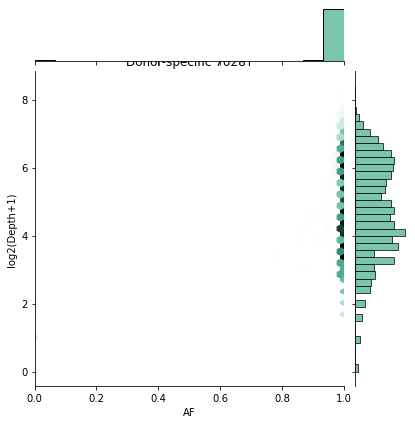

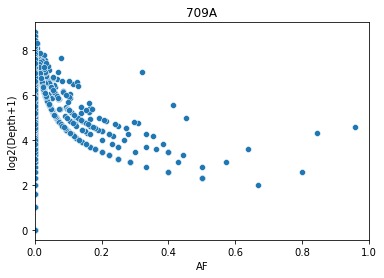

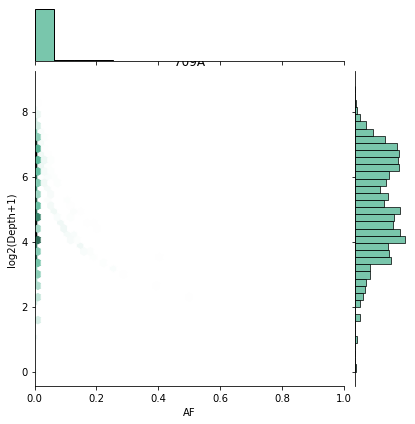

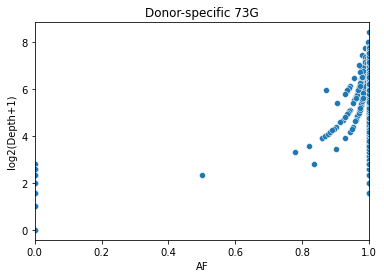

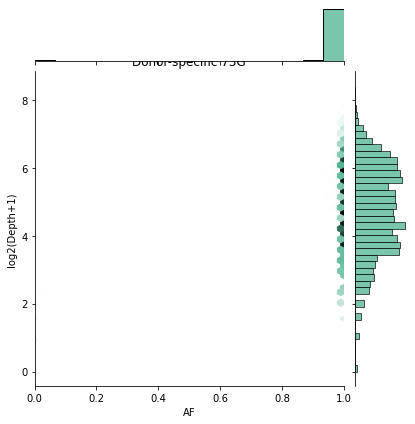

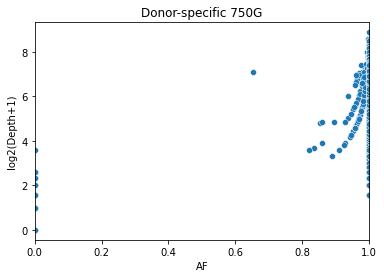

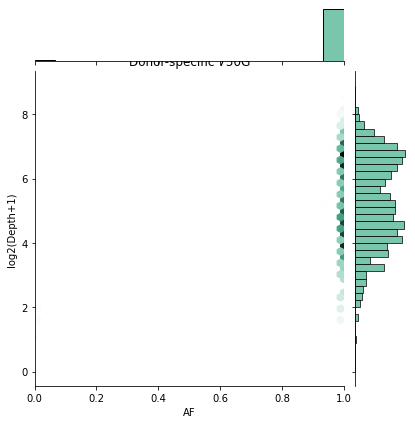

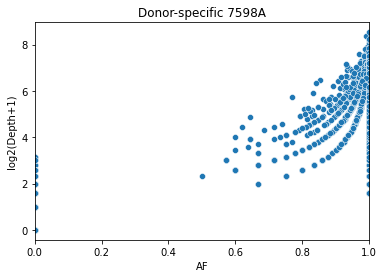

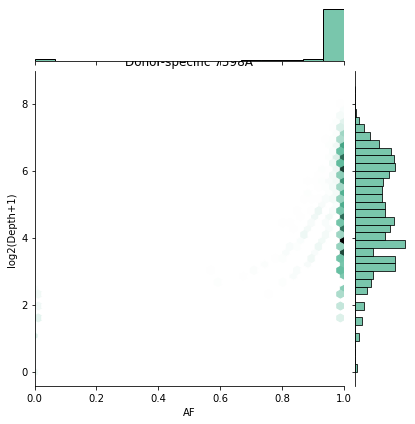

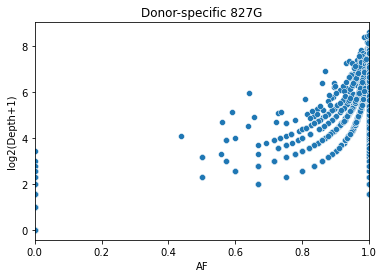

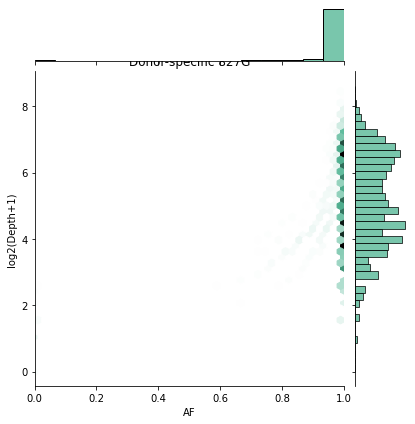

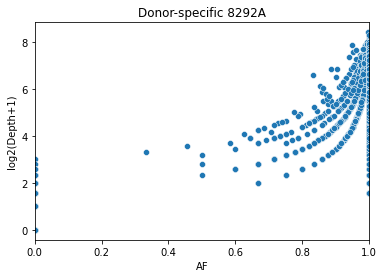

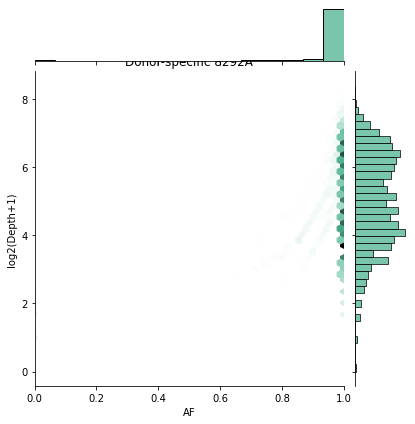

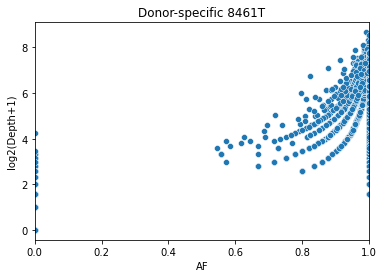

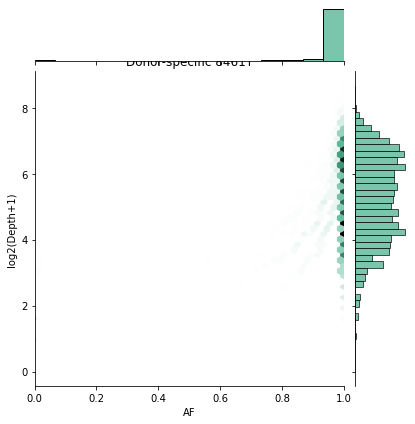

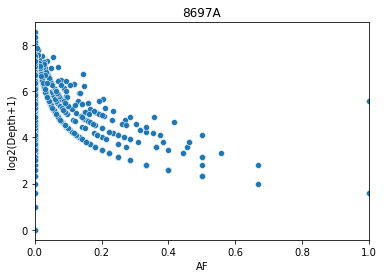

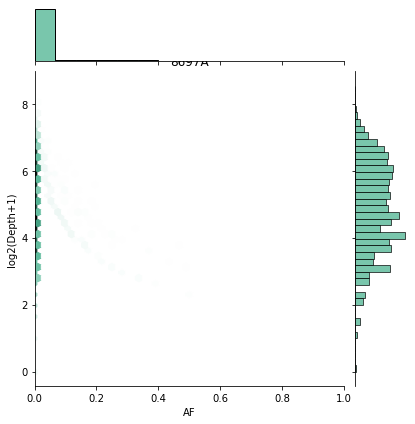

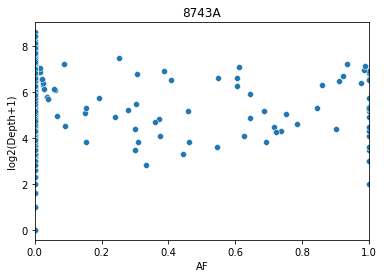

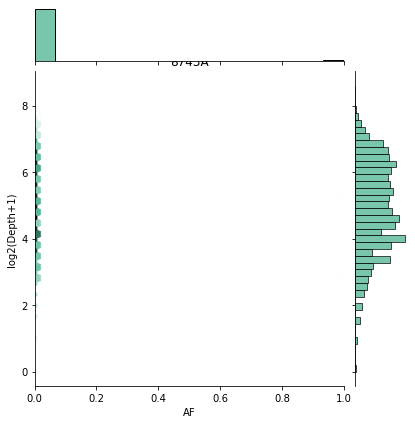

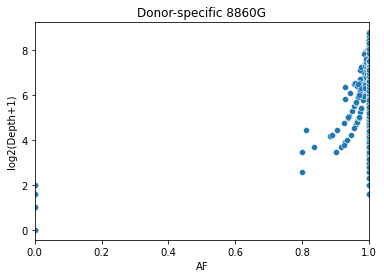

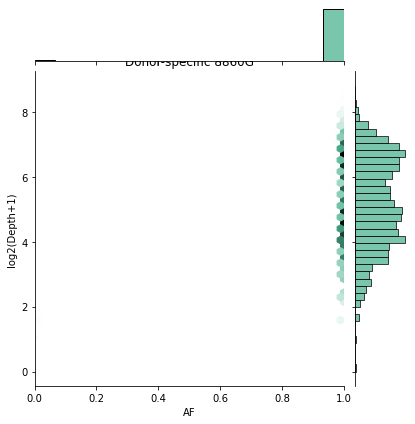

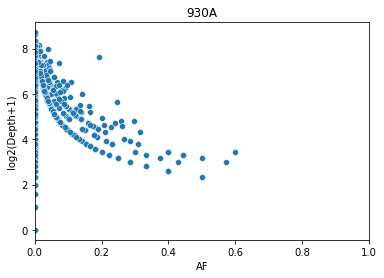

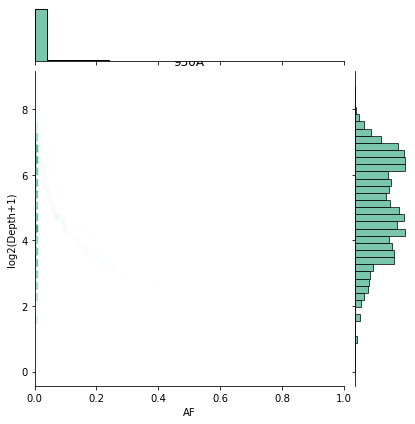

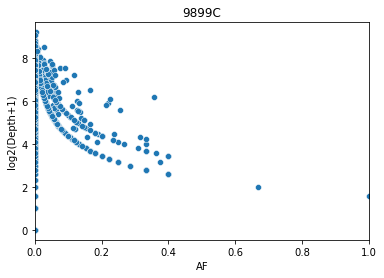

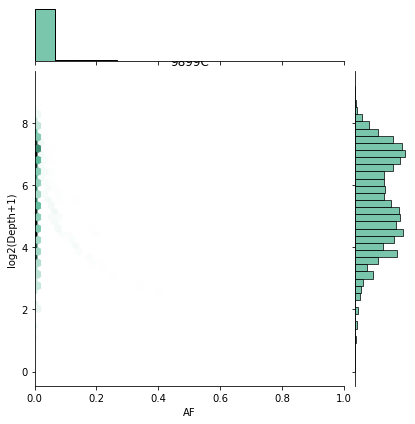

In [11]:
for variant in AF_df.index:
    f = plt.figure()
    sns.scatterplot(x=AF_df.loc[variant], y=np.log2(DP_df.loc[variant]+1))
    plt.xlabel("AF")
    plt.ylabel("log2(Depth+1)")
    if variant in donor_inds:
        plt.title(f"Donor-specific {variant}")
    else:
        plt.title(variant)
    plt.xlim([0,1])    
    plt.savefig(f"{out_f}._{variant}.png")
    
    sns.jointplot(x=AF_df.loc[variant], y=np.log2(DP_df.loc[variant]+1), 
              kind="hex", color="#4CB391")
    plt.xlabel("AF")
    plt.ylabel("log2(Depth+1)")
    plt.xlim([0,1])
    if variant in donor_inds:
        plt.title(f"Donor-specific {variant}")
    else:
        plt.title(variant)

## Clone-variant specific

In [12]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
# if "donor_index" in cells_meta.columns and "lineage_index" in cells_meta.columns:
#     cells_meta = cells_meta.sort_values(["donor_index", "lineage_index"])
#AD_df = pd.merge(AD_df, vcf[["#CHROM", "POS", "ALT"]], how="inner", left_index=True,right_index=True).set_index(["#CHROM", "POS", "ALT"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR].set_index("ID")
curr_labels["name"] = curr_labels["donor"].astype(str) + "_" + curr_labels["lineage"].astype(str)

curr_labels

,lineage,donor,condition,name
ID,,,,
AAACTCGAGTGAAGGA-1_Control,0,0,Control,0_0
AACAGTCCAGAAGTGC-1_Control,0,0,Control,0_0
AACTGTGCAGTTCGGC-1_Control,0,0,Control,0_0
AAGATAGTCAGGCGCT-1_Control,0,0,Control,0_0
ACAAAGATCCAGAGAG-1_Control,0,0,Control,0_0
...,...,...,...,...
ATATTCCGTGCGCATC-1_Control,50,0,Control,0_50
ATCCAGAGTTTCGTTT-1_Control,50,0,Control,0_50
GTCACTCTCGATAGCT-1_Flt3l,50,0,Flt3l,0_50


0_0
0_1
0_10
0_11
0_12
0_13
0_14
0_15
0_16
0_17
0_18
0_19
0_2
0_20
0_21
0_22
0_23
0_24
0_25
0_26
0_27
0_28
0_29
0_3
0_30
0_31
0_32
0_33
0_34
0_35
0_36
0_37
0_38
0_39
0_4
0_40
0_41
0_42
0_43
0_44
0_45
0_46
0_47
0_48
0_49


ZeroDivisionError: float division by zero

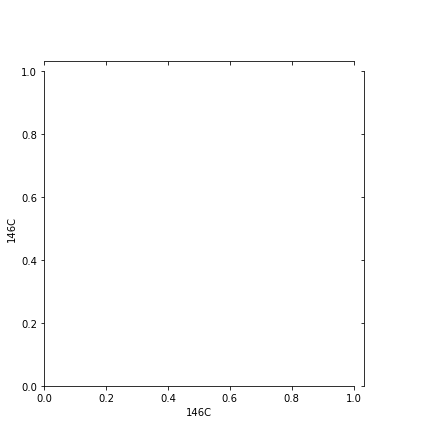

In [13]:
for cln, val in curr_labels.groupby("name"):
    print(cln)
    curr_af = AF_df.loc[:, val.index]
    curr_dp = np.log2(DP_df.loc[:, val.index]+1)

    for variant in curr_af.index:
        if variant in donor_inds:
            title = f"Clone {cln} variant {variant} donor-specific"
        else:
            title = f"Clone {cln} variant {variant}"
        f = plt.figure()
        sns.scatterplot(x=curr_af.loc[variant], y=(curr_dp.loc[variant]))
        plt.xlabel("AF")
        plt.ylabel("log2(Depth+1)")
        plt.title(title)
        plt.xlim([0,1])
        plt.savefig(f"{out_f}.clone_{cln}_{variant}.png")

        plt.close()
        sns.jointplot(x=curr_af.loc[variant], y=curr_dp.loc[variant], 
                  kind="hex", color="#4CB391")
        plt.xlabel("AF")
        plt.ylabel("log2(Depth+1)")
        plt.xlim([0,1])
        plt.title(title)
        plt.savefig(f"{out_f}.clone_{cln}_{variant}_hex.png")
        plt.close()

In [ ]:
# #for n in range(N_DONORS):
# print(curr_ad_f)
# print(curr_dp_f)
# curr_ad = mmread(curr_ad_f).tocsc()
# curr_dp = mmread(curr_dp_f).tocsc()
# AD_df = pd.DataFrame(curr_ad.todense())
# AD_df.index.name = "Variant"
# AD_df.columns.name = "Cell"
# DP_df = pd.DataFrame(curr_dp.todense())
# DP_df.index.name = "Variant"
# DP_df.columns.name = "Cell"
# AF_df = AD_df/(DP_df+0.001)